In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

In [3]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)

In [4]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv = 5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [5]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

scores = cross_val_score(model, X, y, cv = loo)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
scores.mean()

0.96

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [8]:
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [9]:
def make_data(N, err = 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [10]:
X, y = make_data(40)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

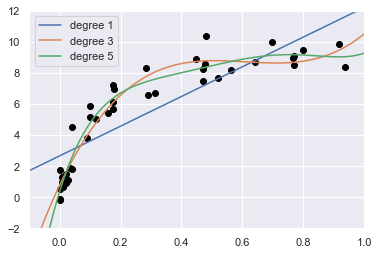

In [12]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

axis = plt.axis()
plt.scatter(X.ravel(), y, color = 'black')

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = f'degree {degree}')
    
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = 'best')

In [13]:
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, param_name = 'polynomialfeatures__degree', 
                                          param_range = degree, cv = 7)

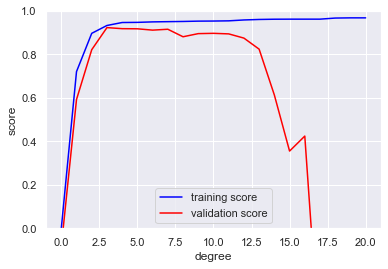

In [14]:
plt.plot(degree, np.median(train_score, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score, 1), color = 'red', label = 'validation score')

plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

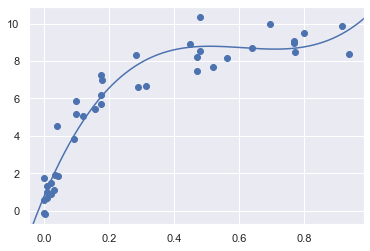

In [15]:
plt.scatter(X.ravel(), y)

lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)

plt.plot(X_test.ravel(), y_test)
plt.axis(lim);

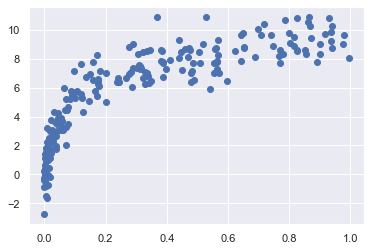

In [16]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

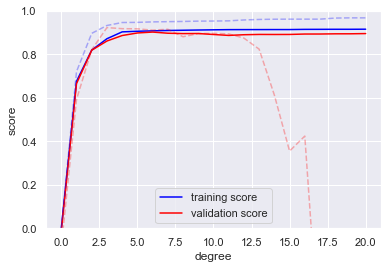

In [17]:
degree = np.arange(21)

train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, param_name = 'polynomialfeatures__degree',
                                           param_range = degree, cv = 7)

plt.plot(degree, np.median(train_score2, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score2, 1), color = 'red', label = 'validation score')

plt.plot(degree, np.median(train_score, 1), color = 'blue', alpha = 0.3, ls = 'dashed')
plt.plot(degree, np.median(val_score, 1), color = 'red', alpha = 0.3, ls = 'dashed')

plt.legend(loc = 'lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

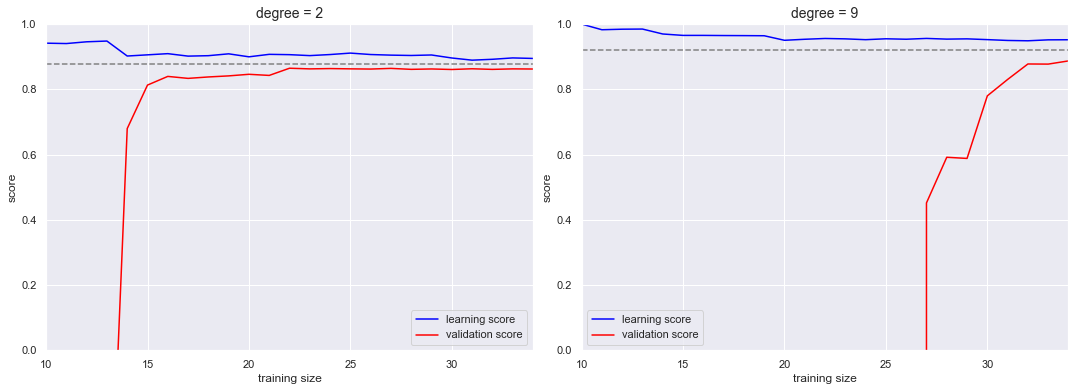

In [18]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv = 7, train_sizes = np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color = 'blue', label = 'learning score')
    ax[i].plot(N, np.mean(val_lc, 1), color = 'red', label = 'validation score')
    
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color = 'gray', ls = '--')
    
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    
    ax[i].set_title(f'degree = {degree}', size = 14)
    ax[i].legend(loc = 'best');

from sklearn.model_selection import GridSearchCV

param_grid = {'estimator__polynomialfeatures': PolynomialFeatures(),
              'estimator__linearregression': LinearRegression(),
              'polynomialfeatures__degree': np.arange(21), 
              'linearregresion__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {'estimator__polynomialfeatures__degree': np.arange(21), 
              'estimator__linearregresion__fit_intercept': [True, False],
              'estimator__linearregression__normalize': [True, False],
              #'estimator__polynomialfeatures': np.arange(21),
              #'estimator__linearregression': [True, False],
              'steps' : [('polynomialfeatures', PolynomialFeatures(2)), ('linearregression', LinearRegression())]}

grid = GridSearchCV(PolynomialRegression(2), param_grid, cv = 7)

In [81]:
grid.fit(X, y)

TypeError: 'PolynomialFeatures' object is not iterable

In [ ]:
grid.best_params_

In [ ]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold = True)
plt.axis(lim);

In [82]:
data = [{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
        {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
        {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
        {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]

In [83]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse = False, dtype = int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [85]:
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

In [86]:
vec = DictVectorizer(sparse = True, dtype = int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [87]:
sample = ['problem of evil', 'evil queen', 'horizon problem']

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [91]:
pd.DataFrame(X.toarray(), columns = vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns = vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


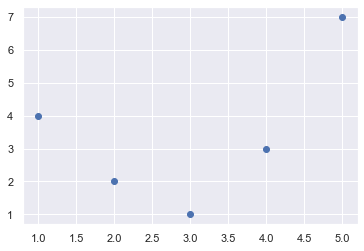

In [94]:
%matplotlib inline

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

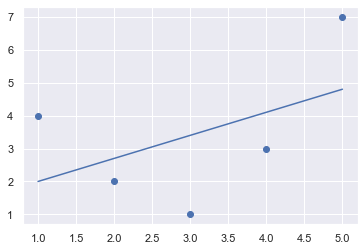

In [95]:
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)

yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [96]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, include_bias = False)
X2 = poly.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

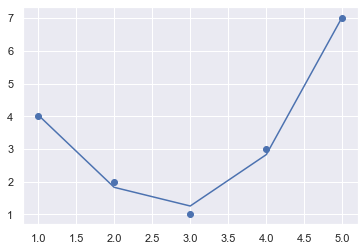

In [98]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)

plt.scatter(x, y)
plt.plot(x, yfit);

In [100]:
X = np.array([[ np.nan, 0,  3  ],
              [ 3,  7,  9  ],
              [ 3,  5,  2  ],
              [ 4,  np.nan, 6  ],
              [ 8,  8,  1  ]])
y = np.array([14, 16, -1,  8, -5])

In [103]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'mean')

X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [104]:
model = LinearRegression().fit(X2, y)

yfit = model.predict(X2)
yfit

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [106]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy = 'mean'), LinearRegression())
model.fit(X, y)

print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[13.14869292 14.3784627  -1.15539732 10.96606197 -5.33782027]


In [107]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy = 'mean'), PolynomialFeatures(degree = 2), LinearRegression())
model.fit(X, y)

print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
